# Perceptron


The perceptron algorithm is a type of supervised learning algorithm for binary classification tasks, meaning it is used to classify data into two categories. It is based on the idea of a simple artificial neuron called a "perceptron" that takes a set of inputs and produces a single output. In this notebook, we apply this algorithm on the penguin dataset.

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boundaries
from mlxtend.plotting import plot_decision_regions

sns.set_theme()

# Read the palmerpenguins dataset into a pandas DataFrame object
df = pd.read_csv("palmer_penguins.txt")

In [24]:
df = df.iloc[:220]
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [25]:
df = df.dropna(how = "any")
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [26]:
df.iloc[:100]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
101,Adelie,Biscoe,41.0,20.0,203.0,4725.0,Male
102,Adelie,Biscoe,37.7,16.0,183.0,3075.0,Female
103,Adelie,Biscoe,37.8,20.0,190.0,4250.0,Male
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,Female


In [27]:
df['species'].value_counts()

Adelie       146
Chinstrap     68
Name: species, dtype: int64

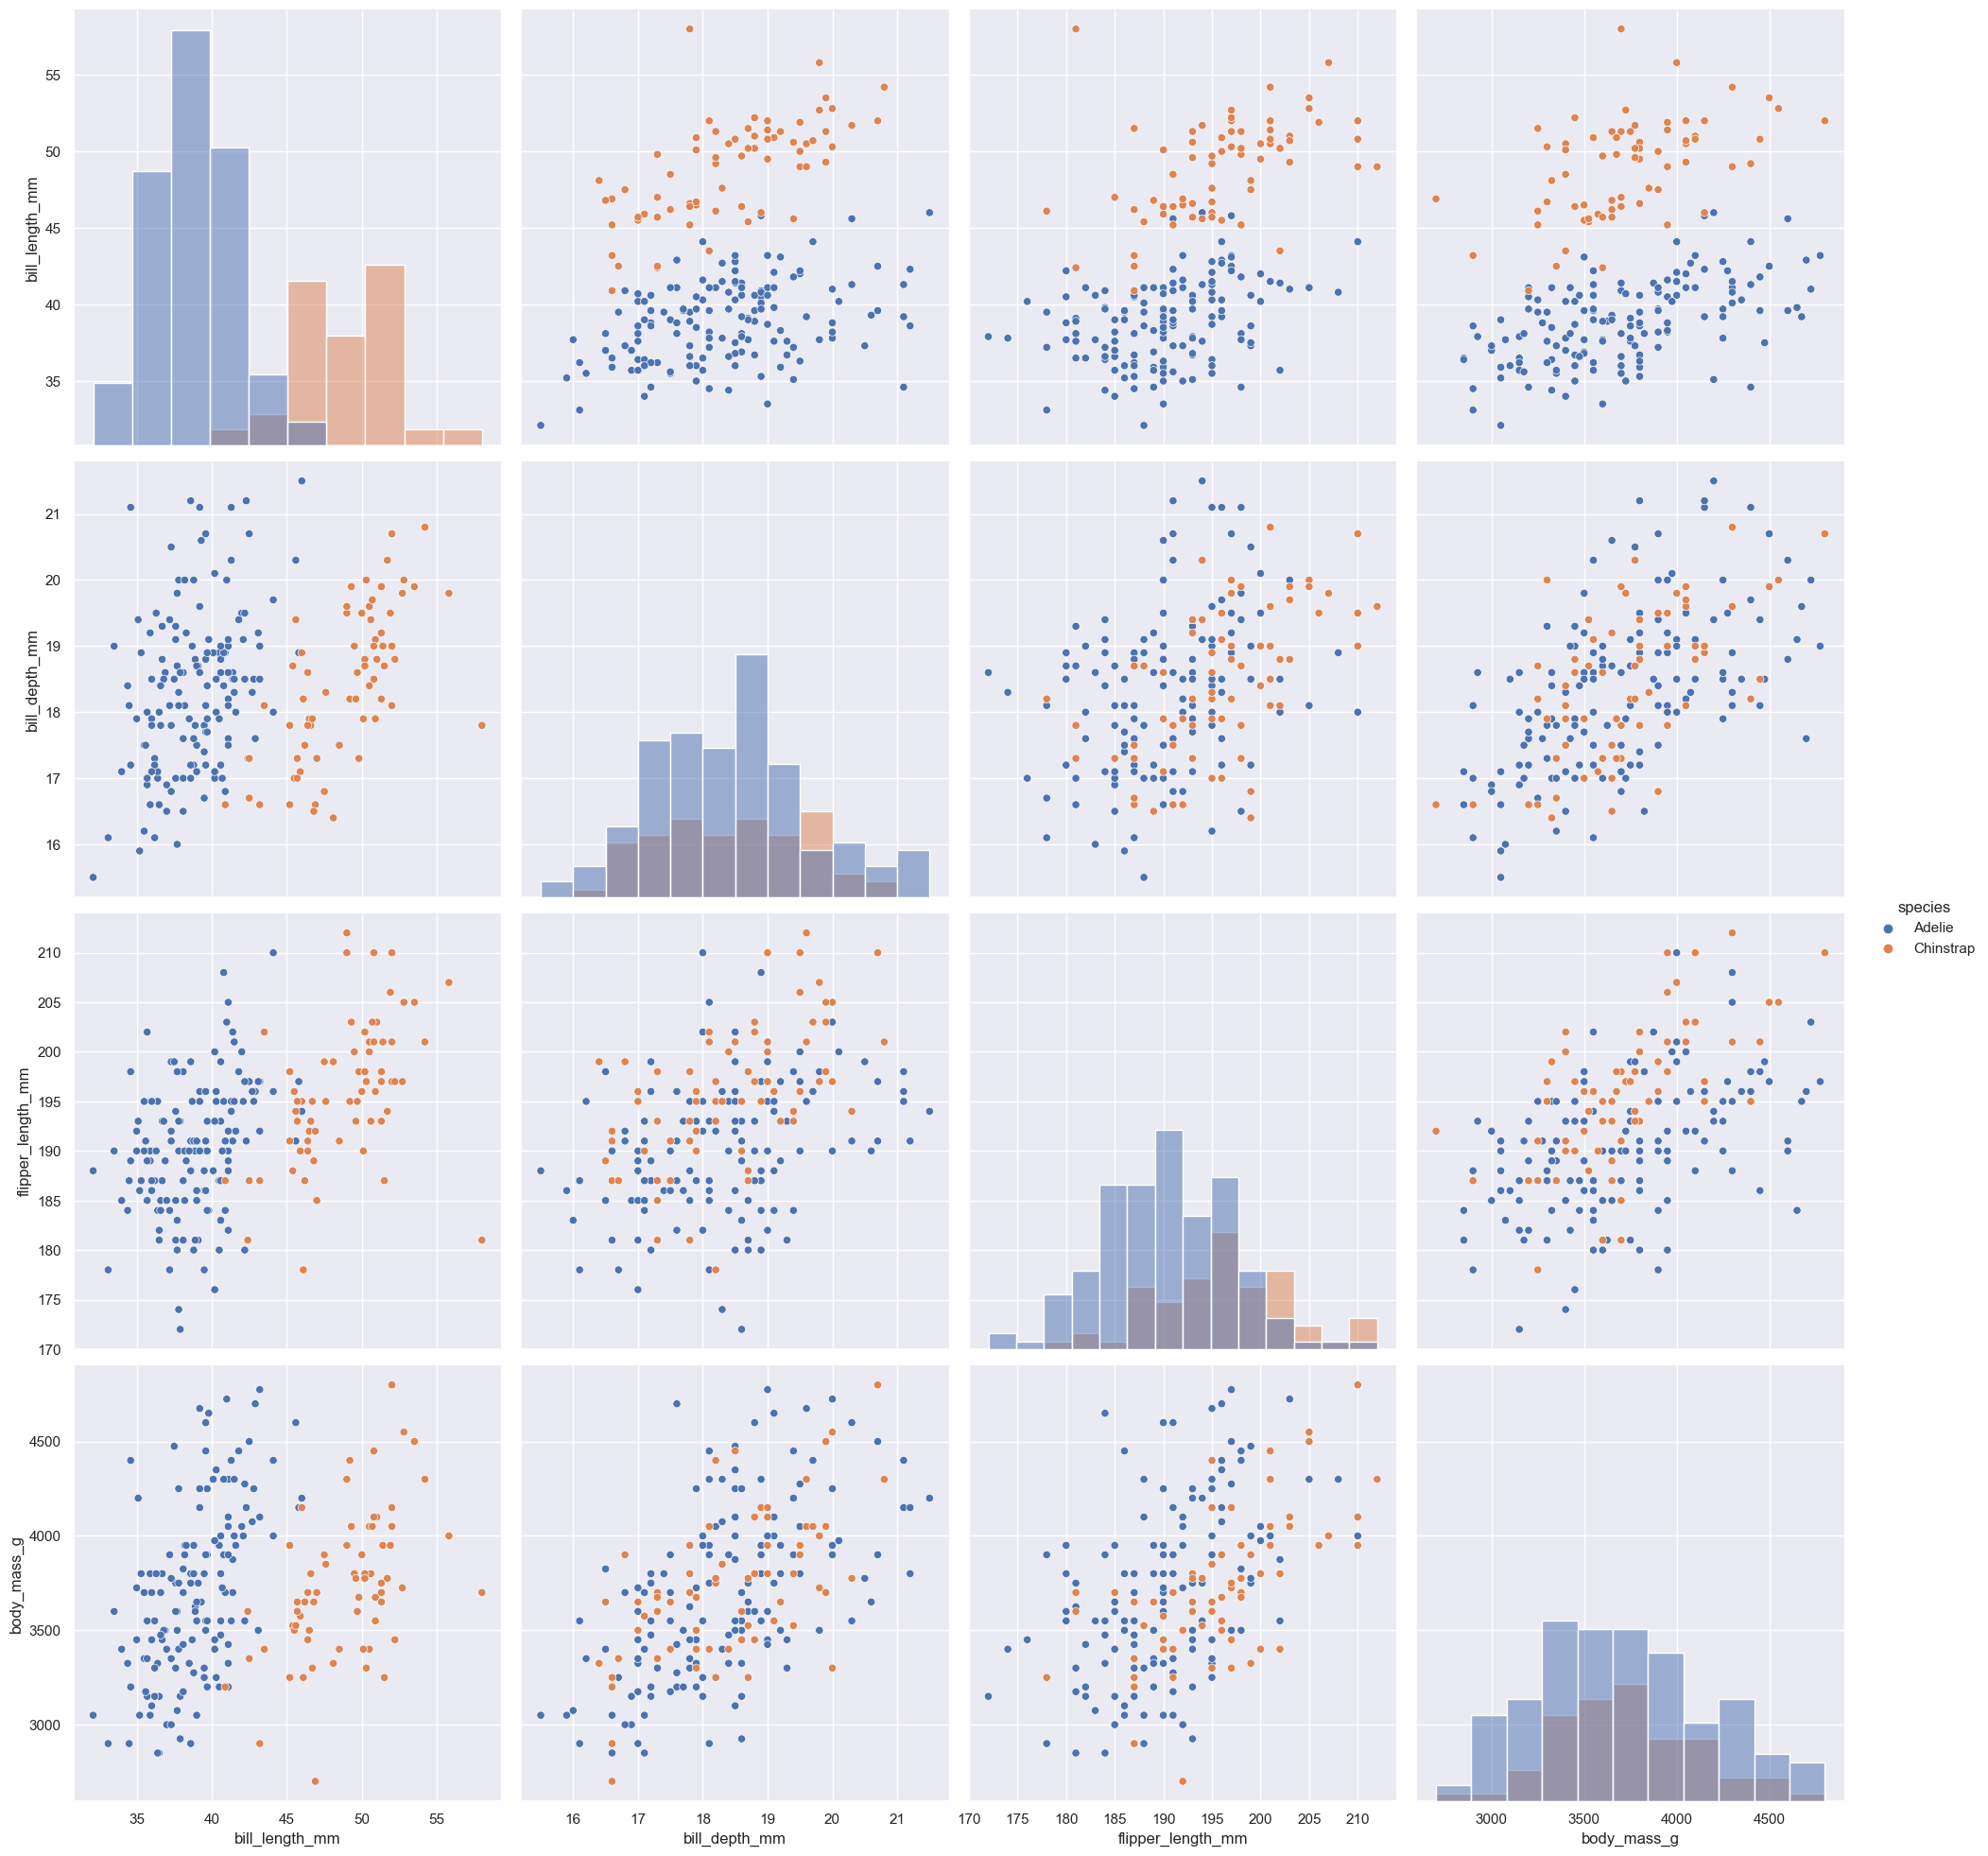

In [28]:
sns.pairplot(df, hue="species", height=5,diag_kind="hist")

/var/folders/_b/hcwjc0m51vz15mg59fc88h5r0000gn/T/ipykernel_40162/2078039817.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')


<Axes: >

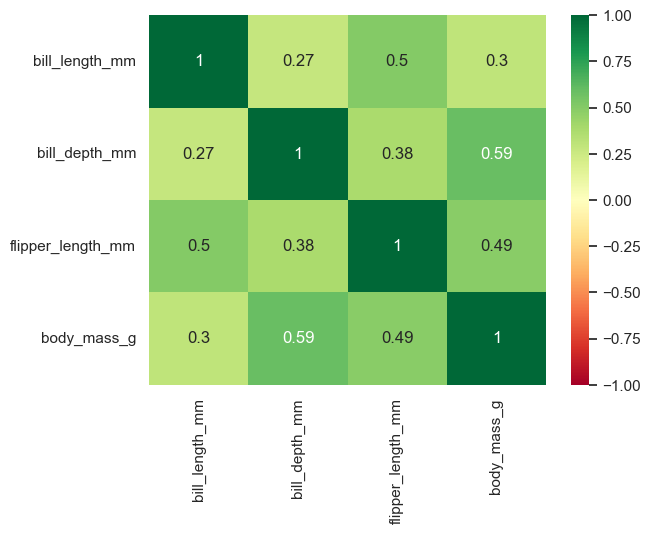

In [29]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')


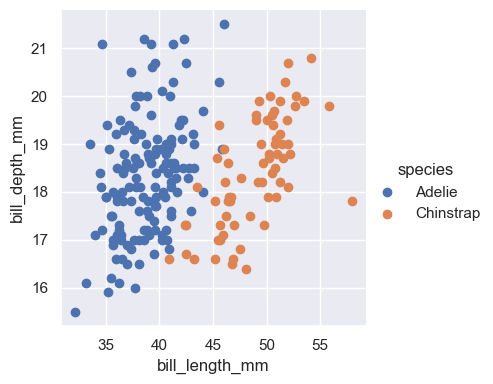

In [30]:
sns.FacetGrid(df, hue="species", height=4) \
   .map(plt.scatter, "bill_length_mm", "bill_depth_mm") \
   .add_legend()

Although the perceptron is capable of processing any number of feature measurements, we will concentrate on only two for the sake of simplicity: "bill length" and "bill depth". Additionally, we must transform the species' string labels into numerical values.

In [31]:
# Store the desired species values in the numpy array y
y = df.species.values
# Convert each entry of y with adelie to -1 and otherwise 1
y = np.where(y == 'Adelie', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["bill_length_mm", "bill_depth_mm"]].values

class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [35]:
model = Perceptron(epochs = 1000)

# Call the train method to train the weights and bias of the given instance
model.train(X, y)

In [36]:
from sklearn.metrics import accuracy_score

# Predict labels on the features in X
y_pred = model.predict(X)

# Compare y_hat and y
print(y == y_pred)

accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

[ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True False  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True False  True  True  True
  True  True  True False  True  True  True  True  True False  True  True
  True  True False False  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

According to the result, we could see the accuracy is high. From the code's output above, it's evident that the predicted values have corresponded with the actual values on the provided dataset.

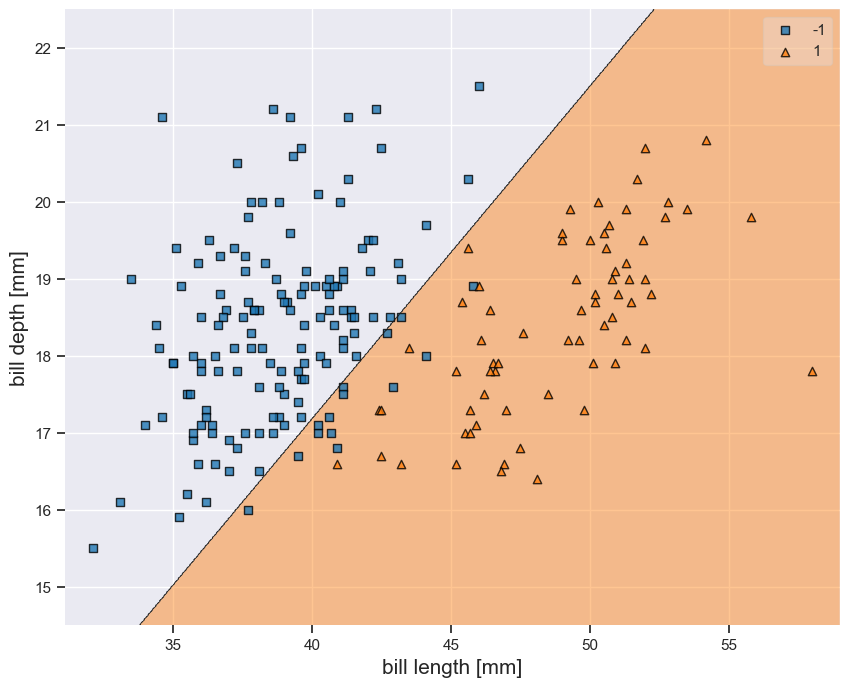

In [37]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = model)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.show()

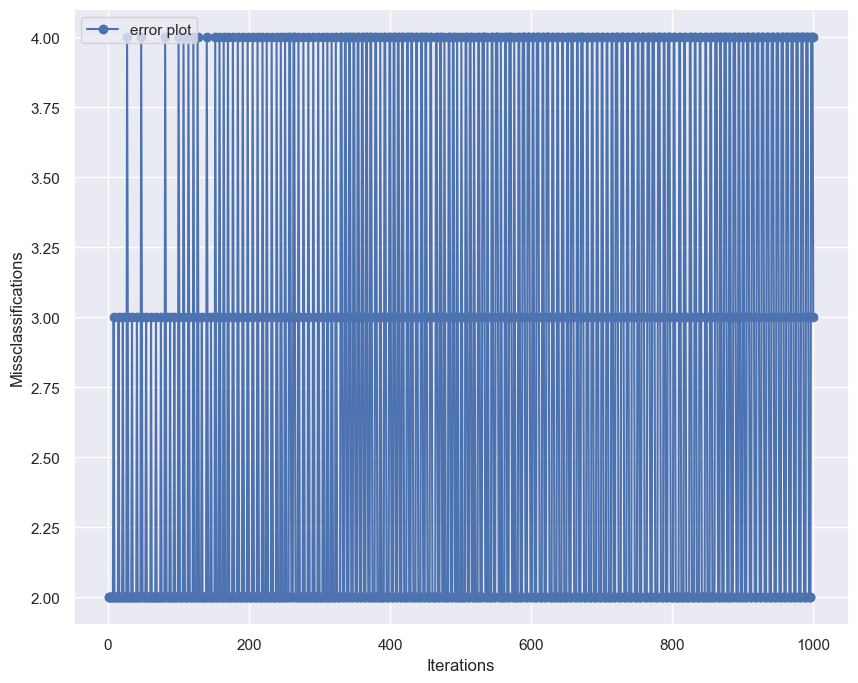

In [38]:
# Error Analysis
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(model.errors_)+1), model.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()